<a href="https://colab.research.google.com/github/akash5169/Deep-Learning/blob/main/Audio-Classification/MusicClassificationWithNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import json
import numpy as np
from google.colab import drive
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import matplotlib.pyplot as plt

In [2]:
drive.mount('/content/drive')
DATASET_PATH="/content/drive/MyDrive/JSON_AUDIO_DATA/data.json"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
def load_data(dataset_path):
  with open(dataset_path,"r") as fp:
    data=json.load(fp)
  
  #convert lists data to numpy arrays
  inputs=np.array(data["mfcc"])
  targets=np.array(data["lables"])

  return inputs,targets

def plot_history(history):
  fig, axs= plt.subplots(2)

  #accuracy subplot
  axs[0].plot(history.history["accuracy"], label="train accuracy")
  axs[0].plot(history.history["val_accuracy"], label="test accuracy")
  axs[0].set_ylabel("Accuracy")
  axs[0].legend(loc="lower right")
  axs[0].set_title("Accuracy Evalution")

  #error subplot
  axs[1].plot(history.history["loss"], label="train error")
  axs[1].plot(history.history["val_loss"], label="test error")
  axs[1].set_ylabel("Error")
  axs[1].legend(loc="upper right")
  axs[1].set_title("Error Evalution")
  axs[1].set_xlabel("epoch")


  plt.show()

In [19]:
if __name__=="__main__":
  #load data
  inputs,targets=load_data(DATASET_PATH)

  #split the data into train and test sets
  inputs_train, inputs_test, targets_train, targets_test= train_test_split(inputs, targets, test_size=0.3)

  #build the network architecture

  #non regularised model
  # model= keras.Sequential([
  #     #input layer
  #     keras.layers.Flatten(input_shape=(inputs.shape[1],inputs.shape[2])),

  #     #1st hidden layer
  #     keras.layers.Dense(512, activation="relu"),

  #     #2nd hidden layer
  #     keras.layers.Dense(256, activation="relu"),

  #     #3rd hidden layer
  #     keras.layers.Dense(64, activation="relu"),

  #     #output layer
  #     keras.layers.Dense(10, activation="softmax")
  # ])

  #regularized model
  model= keras.Sequential([
      #input layer
      keras.layers.Flatten(input_shape=(inputs.shape[1],inputs.shape[2])),

      #1st hidden layer
      keras.layers.Dense(512, activation="relu", kernel_regularizer=keras.regularizers.l2(0.001)),
      keras.layers.Dropout(0.3),

      #2nd hidden layer
      keras.layers.Dense(256, activation="relu", kernel_regularizer=keras.regularizers.l2(0.001)),
      keras.layers.Dropout(0.3),

      #3rd hidden layer
      keras.layers.Dense(64, activation="relu", kernel_regularizer=keras.regularizers.l2(0.001)),
      keras.layers.Dropout(0.3),

      #output layer
      keras.layers.Dense(10, activation="softmax")
  ])

  #compile network
  optimizer= keras.optimizers.Adam(learning_rate=0.0001)
  model.compile(optimizer=optimizer,
                loss="sparse_categorical_crossentropy",
                metrics=["accuracy"])
  
  model.summary()

  #train the network
  history=model.fit(inputs_train, targets_train, 
            validation_data=(inputs_test,targets_test),
            epochs=100,
            batch_size=32)
  
  

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 1690)              0         
                                                                 
 dense_8 (Dense)             (None, 512)               865792    
                                                                 
 dropout_3 (Dropout)         (None, 512)               0         
                                                                 
 dense_9 (Dense)             (None, 256)               131328    
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_10 (Dense)            (None, 64)                16448     
                                                                 
 dropout_5 (Dropout)         (None, 64)               

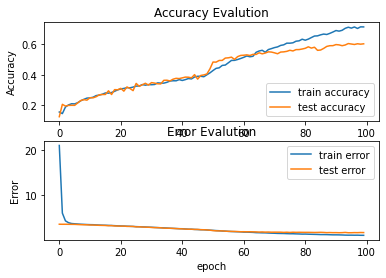

In [20]:
plot_history(history)